In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Introduction

## Readings

* Кормен. Алгоритмы: построение и анализ
* Bishop. Pattern Recognition and Machine Learning
* Christopher Manning. Foundations of Statistical Natural Language Processing
* Peter Flatch. Machine Learning

## Software

pip install jupyter notebook
numpy, scipy, pandas, matplotlib, seaborn, scikit-learn, gensim, lightgbm

and pytorch [https://pytorch.org/]


# Algorithm complexity

Upper bound  
*Def*: $f = O(g)$

$\exists c, n_0: 0 \leq f \leq cg$ for $\forall n \geq n_0$

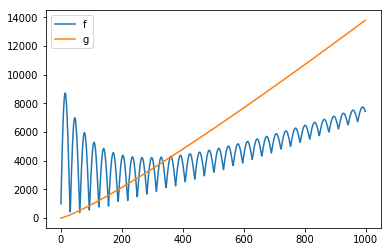

In [54]:
x = np.arange(1,1000)
f = x*np.log(x) + 10**6 * np.abs(np.sin(x/10))/(x+100)
plt.plot(x, f, label='f')

g = x*np.log(x)
c = 2
plt.plot(x, c*g, label='g')

plt.legend()
plt.show()

Lower bound  
*Def*: $ f = \Omega(g)$

$\exists c, n_0: 0 \leq cg \leq f $ for $\forall n \geq n_0$

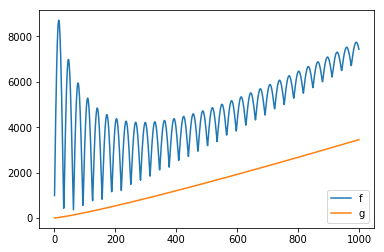

In [56]:
x = np.arange(1,1000)
f = x*np.log(x) + 10**6 * np.abs(np.sin(x/10))/(x+100)
plt.plot(x, f, label='f')

g = x*np.log(x)
c = 1/2
plt.plot(x, c*g, label='g')

plt.legend()
plt.show()

Tight bound

*Def*: $f = \Theta(g)$

$\exists c_1, c_2, n_0: 0 \leq c_1g \leq f \leq c_2g$ for $\forall n \geq n_0$

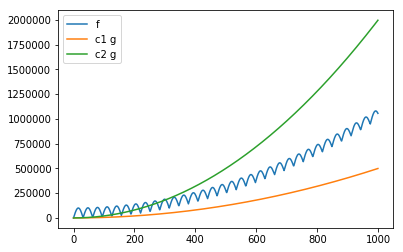

In [67]:
x = np.arange(0,1000)
f = x**2 - x + 10**5 * np.abs(np.sin(x/10))
plt.plot(x, f, label='f')

g = x**2
plt.plot(x, 0.5*g, label='c1 g')
plt.plot(x, 2*g, label='c2 g')

plt.legend()
plt.show()

## Masters theorem

Let $T(n)$ be a monotonically increasing function:
$T(n) = a T (\frac n b) + f(n)$  
$T(1) = c$  

for some $a \geq 1, b \geq 2, c > 0$ and $f(n) = \Theta(n^d)$ is some polynomial

then  

if $a < b ^ d$ => $T(n) = O (b^d)$  
if $a = b ^ d$ => $T(n) = O (n^d \log n)$  
if $a > b ^ d$ => $T(n) = O (n^{\log_b a})$  
    

## Operations on vectors

### Sum of 2 vectors

In [ ]:
import random

a = [random.random() for _ in range(100000)]
b = [random.random() for _ in range(100000)]
c = [0 for _ in range(100000)]
a[:3]

In [78]:
%%time 
for i in range(len(a)):
    c[i] = a[i] + b[i]
c[:3]

CPU times: user 36 ms, sys: 8 ms, total: 44 ms
Wall time: 42.7 ms


In [79]:
%%time

a = np.array(a)
b = np.array(b)
c = a + b

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 8.64 ms


### Scalar product

In [83]:
%%time 

s  = 0
for i in range(len(a)):
    s += a[i] * b[i]
    
print(s)

25041.496880022834
CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 45.5 ms


In [82]:
%%time

a.dot(b)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 291 µs


25041.49688002286

# Hashing functions

## Universal Family of hash functions

Family of hash functions $H= \{\; h: X \rightarrow [0, m-1] \; \}$ is called universal family if  
$Pr[\;h(x) = h(y) | x \neq y\;] \leq \frac 1 m $ for some $h$ taken random from $H$


## Hashing intergers

For some prime number $p$ and $ a \in [1, p-1], \; b \in [0, p-1] $  

$ H_p = \{ \; h_p^{a,b}(x) = (ax+b) \; (mod \; p) \; \}$,    

In [41]:
def hash_int(x, a=112, b=22, p=997):
    return (a*x + b) % 997

## Hashing strings

For some big prime number $p$ and string S and $x \in [1, p-1]$ 

$P_p = \{ \; h_p^x(S) = \sum^{|S|-1}_{j=0} s_j \:  x^j \; (mod \;  p) \; \}$

In [18]:
def poly_hash(s, x=31, p=997):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

## How to fit string hashtable into memory


$H = \{\; h(s) = h_m^{a,b}(\; h_p^x(\;S\;)\;) \; | \; h_p^x \in P_p, \; h_p^{a,b} \in H_m\;\}$

Probability of collision for 2 strings with $L = max(|S_1|, |S_2|)$  
$Pr[h(S_1) = h(S_2) \; | \; s1 \neq s2] \leq \frac 1 m + \frac L p $

# Bloom filter

is a  data structure, similar to hashtables, with the following properties:  

* insert => O(1) complexity  
* lookup => O(1) complexity
* memory => O(1)

Compared to a hashtable, it is much more space efficient.  

Cons:
1. Cannot store associated object
2. Deletion is not allowed
3. Small probability of false positives

Applications:
1. antient spellcheckes
2. forbidden passwords
3. network routers
4. number of duplicates in a stream 
5. discard siglenton features from classifier
6. web crawlers

Ingridients:  
1. bit array
2. k hash functions, k = small const

Let's implement it now...

Probabilistic properties:  
Main idea: more space and more hash functions we use => less false postive  we make  

$n$ - number of bits in the array

Probabilty $P$ that a given bit in the filter has been set to 1 after dataset S was inserted.
$P = 1 - (1 - \frac 1 n )^{k|S|} \leq 1 - e^{-\frac {k|S|}{n}}$

Then, False  positive probabilty is  $\epsilon \leq  (1 - e^{-\frac {k|S|}{n}})^k $ 

Solve:
$\epsilon(k) \rightarrow \min_k$  

Optimal number of hash functions:
$k = \frac n {|S|} \ln 2$
=> $\epsilon = (\frac 1 2) ^ {\frac n {|S|} \ln 2}$  
Usually we fix error rate $\epsilon$ and number of objects $|S|$, then array size required is:
$ n = \frac 1 {(\ln 2)^2} |S|ln(\frac 1 \epsilon) $

# Rabin-Karp Algorithm

Given pattern P and text T,  
find all i:  
    T[i: i + |P| - 1] = P

## Naive implementation of substring search 

In [6]:
def search_naive(text, pattern):
    indices = []
    for i in range(len(text) - len(pattern)):
        if text[i: i + len(pattern)] == pattern:
            indices.append(i)
    return indices

Complexity of naive search is O( |T| |P| )

In [33]:
from unittest import *


class SearchNaiveTest(TestCase):
    def setUp(self):
        self.search = search_naive
    def test_empty(self):
        text = ''
        pattern = 'smth'
        self.assertEqual(len(self.search(text, pattern)), 0)
        
    def test_big_pattern(self):
        text = 'blabla'
        pattern = 'blablabla'
        self.assertEqual(len(self.search(text, pattern)), 0)
        
    def test_count(self):
        text = 'Betty Botter bought some butter, \
            But, she said, the butter’s bitter. \
            If I put it in my batter, \
            It will make my batter bitter.'
        pattern = 'tt'
        indices = [2, 8, 27, 66, 75, 113, 149, 156]
        self.assertListEqual(self.search(text, pattern), indices)
        
        
case = SearchNaiveTest()
suite = TestLoader().loadTestsFromModule(case)
TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

It means that the complexity is linear by |T|

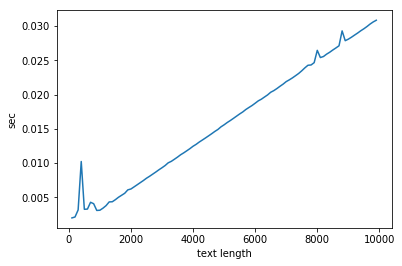

In [8]:
import time


x = np.arange(100,10000, 100)
y = []
for t in x:
    text = 'abcdekjnwenfwnefnwnle'*t
    pattern = 'jnwenfw'
    
    start = time.time()
    search_naive(text, pattern)
    y.append(time.time() - start)
    
plt.plot(x, y)
plt.xlabel('text length')
plt.ylabel('sec')
plt.show()

And it also is linear by |P|

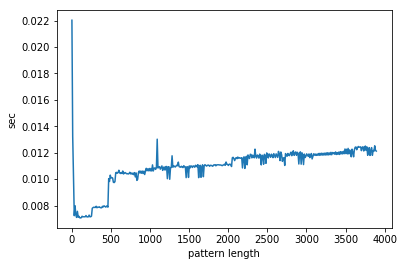

In [15]:
import time

max_pattern = 'abcdekjnwenfwnefnwnlejwefnwenfwefniwenf'*100
x = np.arange(2, len(max_pattern), 10)
y = []
for t in x:
#     text = 'abcdekjnwenfwnefnwnlejwefnwenfwefniwenf wefwer'*100
    text = 'wefwer'*1000 + 'abcdekjnwenfwnefnwnlejwefnwenfwefniwenf'*1000 + 'efwe'*1000
    pattern = max_pattern[:t]
    
    start = time.time()
    search_naive(text, pattern)
    y.append(time.time() - start)
    
plt.plot(x, y)
plt.xlabel('pattern length')
plt.ylabel('sec')
plt.show()

## Naive Rabin Karp algorithm

Improvenment: use hash functions for fast string comparison  

if $hash(P) \neq hash(S)  \Rightarrow P != S$

if $hash(P) = hash(S)  \Rightarrow$ might be $ P = S$

collision probability $Pr[h(P) = h(S) | P \neq S]   \leq  $$ |P|\over {p}$ for polynomial hashing


In [20]:
def search_rabin_naive(text, pattern):
    if len(pattern) == 0:
        return []
    indices = []
    pattern_hash = poly_hash(pattern)
    for i in range(len(text) - len(pattern) + 1):
        substr_hash = poly_hash(text[i: i + len(pattern)])
        if substr_hash == pattern_hash:
            if text[i: i + len(pattern)] == pattern:
                indices.append(i)
    return indices

Complexity of naive search is O( |T| |P| )

In [34]:
from unittest import *


class SearchRabinTest(SearchNaiveTest):
    def setUp(self):
        self.search = search_rabin_naive
        
case = SearchRabinTest()
suite = TestLoader().loadTestsFromModule(case)
TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Optimization: Let's recompute hashes

$h[i] := hash(\: s[i: i + len(P) \:)$

$\Rightarrow h[i] = sum^{i+|P|-1}_{j=i} T[j] \: x^{j-i}  \; (mod \;  p)$

$\Rightarrow h[i+1] = sum^{i+|P|}_{j=i} T[j] \: x^{j-i-1} \;  (mod \;  p)$

$\Rightarrow h[i] = xh[i+1] + T[i] - T[i+|P|] \: x^{|P|} \;  (mod \;  p)$

In [21]:
def search_rabin_optimized(text, pattern, x=31, p=997):
    indices = []
    
    if len(pattern) == 0:
        return []
    
    if len(text) < len(pattern):
        return []
    
    # precompute hashes
    precomputed = [0] * (len(text) - len(pattern) + 1)
    precomputed[-1] = poly_hash(text[-len(pattern):], x, p)
    
    factor = 1
    for i in range(len(pattern)):
        factor = (factor*x + p) % p
        
    for i in range(len(text) - len(pattern)-1, -1, -1):
        precomputed[i] = (precomputed[i+1] * x + ord(text[i]) - factor * ord(text[i+len(pattern)]) + p) % p
    
    pattern_hash = poly_hash(pattern, x, p)
    for i in range(len(precomputed)):
        if precomputed[i] == pattern_hash:
            if text[i: i + len(pattern)] == pattern:
                indices.append(i)
    
    return indices

Complexity of Rabin Karp Algorithm is $O(T + nP)$, where n - number of occurences of $P$ in $T$

In [36]:
from unittest import *


class SearchRabinOptimizedTest(SearchNaiveTest):
    def setUp(self):
        self.search = search_rabin_optimized
        
case = SearchRabinOptimizedTest()
suite = TestLoader().loadTestsFromModule(case)
TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>